## Student Name: Vilohit Keshava Murthy Achar

## Student ID: 23077751


In [2]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.8 MB/s eta 0:00:00


In [3]:
import operator
import math
import random
import numpy
import matplotlib.pyplot as plt
import pandas as pd
from deap import algorithms, base, creator, tools, gp

In [4]:
def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1

def psin(n):
    try:
        return numpy.sin(n)
    except Exception:
        return numpy.nan

def pcos(n):
    try:
        return numpy.cos(n)
    except Exception:
        return numpy.nan

def pow2(n):
    return operator.pow(n, 2)

In [5]:
data_points = [(0.05, -5.920472905375246e-06), (0.35, -0.008657128698830847), (0.65, -0.04893233110534319), (0.95, -0.09650694284366339), (1.25, -0.1198965923123214), (1.55, -0.01609080392499869), (1.85, 0.3309083626081094), (2.15, 0.733608667330639), (2.45, 0.8186871380016217), (2.75, 0.5321544028706404), (3.05, 0.1234051649414878), (3.35, -0.278182980554089), (3.649999999999999, -0.6486636751053088), (3.95, -0.8067957595201792), (4.25, -0.5933828647782589), (4.55, -0.1838193240995138), (4.85, 0.1050201247164789), (5.150000000000001, 0.1983465163192565), (5.450000000000001, 0.2186475486424381), (5.750000000000001, 0.2059303444221521), (6.050000000000001, 0.1112902435947829), (6.350000000000001, -0.02966156204610288), (6.650000000000001, -0.1121040527995223), (6.950000000000001, -0.1093909383615195), (7.250000000000002, -0.0778333184274862), (7.550000000000001, -0.04704394290562166), (7.850000000000001, -0.0007476897199050684), (8.150000000000002, 0.05525309487567331), (8.450000000000001, 0.08300536348115052), (8.750000000000002, 0.06756590687044263), (9.05, 0.03333770111075977), (9.350000000000001, 0.005325315277578894), (9.65, -0.01321537564831456), (9.950000000000001, -0.02483287990250848), (0.15, -0.0004197490074396078), (0.25, -0.002744011962215962), (0.45, -0.01888024838080345), (0.55, -0.03281107258572483), (0.75, -0.06560096236716338), (0.85, -0.08166740530354051), (1.05, -0.109383732295163), (1.15, -0.1184462034256205), (1.35, -0.1078791480794438), (1.45, -0.07538681808122603), (1.65, 0.07339461083608066), (1.75, 0.1915363368441183), (1.95, 0.4786681161315149), (2.05, 0.6185024362862599), (2.25, 0.809947806298645), (2.35, 0.8389089510601118), (2.55, 0.7540465107814242), (2.65, 0.6546009929076181), (2.85, 0.3978806420930439), (2.95, 0.2601276974469659), (3.15, -0.01126090293203677), (3.25, -0.1448333887352612), (3.45, -0.4101234722641215), (3.55, -0.5362052262266439), (3.75, -0.7375694202701226), (3.85, -0.7928746150065994), (4.05, -0.775882243022089), (4.15, -0.7022105431691226), (4.35, -0.4613247003684112), (4.45, -0.3201803624891209), (4.65, -0.06353862043288007), (4.75, 0.03353251584373382), (4.95, 0.1528419944793204), (5.05, 0.1819037178326882), (5.25, 0.207808845646738), (5.35, 0.21411380276363), (5.55, 0.220495761638348), (5.65, 0.2172098057887873), (5.85, 0.1845345578223014), (5.95, 0.1525012685657079), (6.15, 0.06417488813893034), (6.25, 0.01561163500816949), (6.45, -0.06755482772181315), (6.55, -0.09535622462919775), (6.75, -0.1185458646762452), (6.85, -0.1167340980679437), (7.05, -0.09921681054057341), (7.15, -0.08831177985834694), (7.35, -0.0679429329999461), (7.45, -0.05801810054578526), (7.65, -0.03406468214166072), (7.75, -0.01857349990905337), (7.95, 0.01851620555565741), (8.05, 0.03775899036260407), (8.25, 0.06935268923669112), (8.35, 0.07881262857403715), (8.55, 0.08199608838545486), (8.65, 0.07647337762906103), (8.85, 0.05659811005778664), (8.95, 0.04484486737005573), (9.15, 0.02275613893719095), (9.25, 0.01341375547071004), (9.45, -0.001675269226643721), (9.55, -0.007803671898095639), (9.75, -0.01794152679802587), (9.85, -0.02187959202330041)]

# Function set definition
pset = gp.PrimitiveSet("MAIN", 1)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(protectedDiv, 2)
pset.addPrimitive(operator.neg, 1)
pset.addPrimitive(psin, 1)
pset.addPrimitive(pcos, 1)
pset.addPrimitive(pow2, 1)
pset.addPrimitive(math.cos, 1)
pset.addPrimitive(math.sin, 1)
pset.addEphemeralConstant("rand101", lambda: random.random())

def evalSymbReg(individual):

    func = toolbox.compile(expr=individual)

    try:
        diff = sum((func(row[0]) - row[1]) ** 2 for row in data_points)
        error = diff / len(data_points)
        if error > 10:
            error = 10
        nodes, edges, labels = gp.graph(individual)
        return error, len(nodes)
    except Exception as e:

        return 10, 0

/usr/local/lib/python3.10/dist-packages/deap/gp.py:254: RuntimeWarning: Ephemeral rand101 function cannot be pickled because its generating function is a lambda function. Use functools.partial instead.
  warnings.warn("Ephemeral {name} function cannot be "


In [7]:
toolbox = base.Toolbox()

creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)
toolbox.register("evaluate", evalSymbReg)
toolbox.register("select", tools.selTournament, tournsize=5)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=5)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)
toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))


In [8]:
population_size = 300
number_of_generations = 50

pop = toolbox.population(n=population_size)
hof = tools.HallOfFame(1)
stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("avg", numpy.mean)
mstats.register("std", numpy.std)
mstats.register("min", numpy.min)
mstats.register("max", numpy.max)

pop, logbook = algorithms.eaSimple(pop, toolbox, 0.5, 0.2, number_of_generations, stats=mstats,
                                   halloffame=hof, verbose=True)

   	      	                        fitness                        	                      size                     
   	      	-------------------------------------------------------	-----------------------------------------------
gen	nevals	avg    	gen	max	min      	nevals	std    	avg    	gen	max	min	nevals	std    
0  	300   	3.48121	0  	10 	0.0902546	300   	3.20646	3.38333	0  	7  	2  	300   	1.37467
1  	183   	nan    	1  	nan	nan      	183   	nan    	4.72667	1  	40 	1  	183   	4.59042
2  	168   	nan    	2  	nan	nan      	168   	nan    	4.91333	2  	29 	1  	168   	4.13431
3  	196   	nan    	3  	nan	nan      	196   	nan    	4.76667	3  	35 	1  	196   	4.04791
4  	182   	nan    	4  	nan	nan      	182   	nan    	4.57333	4  	30 	1  	182   	3.98973


<ipython-input-4-5fcdb155f876>:3: RuntimeWarning: divide by zero encountered in double_scalars
  return left / right
<ipython-input-4-5fcdb155f876>:9: RuntimeWarning: invalid value encountered in sin
  return numpy.sin(n)
<ipython-input-4-5fcdb155f876>:15: RuntimeWarning: invalid value encountered in cos
  return numpy.cos(n)


5  	189   	nan    	5  	nan	nan      	189   	nan    	4.33333	5  	30 	1  	189   	3.25713
6  	168   	3.05062	6  	42 	0.0890269	168   	4.20256	5.37667	6  	42 	1  	168   	4.40244
7  	178   	3.73532	7  	31 	0.0526019	178   	4.10662	6.52   	7  	31 	1  	178   	3.32409
8  	155   	4.1971 	8  	37 	0.0526019	155   	4.90653	7.40667	8  	37 	1  	155   	4.49013
9  	168   	4.32997	9  	36 	0.0503501	168   	4.79484	7.78333	9  	36 	1  	168   	3.96355
10 	185   	4.84517	10 	40 	0.0419809	185   	5.24688	8.66667	10 	40 	1  	185   	4.26015
11 	182   	nan    	11 	nan	nan      	182   	nan    	10.46  	11 	40 	3  	182   	4.88485
12 	177   	nan    	12 	nan	nan      	177   	nan    	12.9633	12 	49 	4  	177   	6.56115
13 	165   	6.79828	13 	43 	0.0387828	165   	7.49252	12.5067	13 	43 	3  	165   	6.23458


<string>:1: RuntimeWarning: invalid value encountered in double_scalars


14 	194   	7.20182	14 	49 	0.0379685	194   	7.7927 	13.1333	14 	49 	1  	194   	6.44688
15 	181   	7.54699	15 	46 	0.0370062	181   	7.91651	14.0667	15 	46 	2  	181   	5.70516
16 	171   	7.5153 	16 	33 	0.0370062	171   	7.43209	14.07  	16 	33 	1  	171   	4.13664
17 	200   	7.83521	17 	39 	0.0363005	200   	7.76147	14.55  	17 	39 	1  	200   	4.6905 
18 	182   	8.05879	18 	46 	0.0363005	182   	8.21125	15.1733	18 	46 	1  	182   	5.16623
19 	205   	8.45139	19 	41 	0.0356338	205   	8.054  	15.5167	19 	41 	3  	205   	4.41245
20 	179   	8.29818	20 	39 	0        	179   	8.33393	15.99  	20 	39 	6  	179   	4.14446
21 	197   	8.74404	21 	40 	0.0344173	197   	8.65304	16.45  	21 	40 	1  	197   	4.88407
22 	167   	8.53914	22 	35 	0.0323008	167   	8.59274	16.4233	22 	35 	3  	167   	4.31479
23 	184   	8.90828	23 	37 	0.0323008	184   	8.72704	16.7367	23 	37 	1  	184   	4.6376 
24 	176   	9.42669	24 	56 	0.0323008	176   	9.6889 	18.19  	24 	56 	6  	176   	5.43451
25 	192   	10.6245	25 	42 	0.0323008	192   

In [11]:
best_case = hof[0]
print("Best Individual:", best_case)

Best Individual: mul(add(pow2(mul(cos(ARG0), psin(mul(0.3589099436285137, ARG0)))), add(pow2(mul(pow2(mul(psin(protectedDiv(protectedDiv(add(pcos(0.6794323338018118), sin(add(sin(neg(psin(pcos(ARG0)))), sin(neg(psin(pcos(ARG0))))))), sub(ARG0, 0.9621957450608766)), sub(ARG0, 0.9621957450608766))), psin(ARG0))), sin(cos(ARG0)))), add(pow2(mul(cos(ARG0), psin(protectedDiv(mul(0.3589099436285137, protectedDiv(sin(ARG0), psin(0.13700237079366162))), sub(ARG0, mul(cos(ARG0), psin(protectedDiv(mul(0.3589099436285137, protectedDiv(sin(ARG0), ARG0)), sub(ARG0, 0.12566725400317358))))))))), sin(neg(psin(mul(cos(ARG0), psin(mul(0.3589099436285137, ARG0))))))))), sin(ARG0))


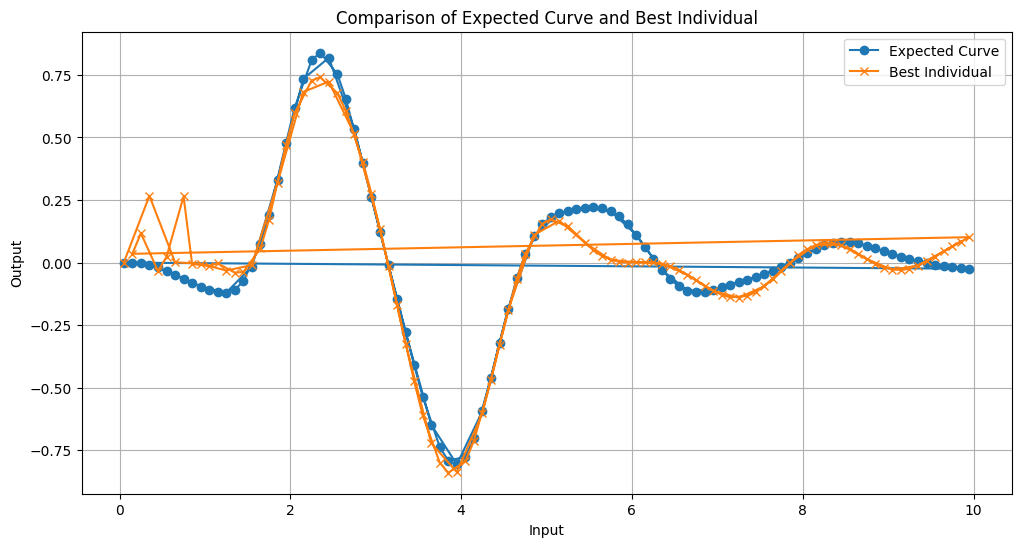

In [12]:
func = gp.compile(expr=best_case, pset=pset)
predicted_outputs = [func(x) for x, _ in data_points]
inputs = [x for x, _ in data_points]
expected_outputs = [y for _, y in data_points]

# Visulization

plt.figure(figsize=(12, 6))
plt.plot(inputs, expected_outputs, 'o-', label='Expected Curve')
plt.plot(inputs, predicted_outputs, 'x-', label='Best Individual')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Comparison of Expected Curve and Best Case')
plt.legend()
plt.grid(True)
plt.show()